In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
preg_raw = pd.read_csv("2002FemPregOut.csv")
preg_raw.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglngth,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,3316.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,3925.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,1433.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,1783.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,1833.0,12999.542264


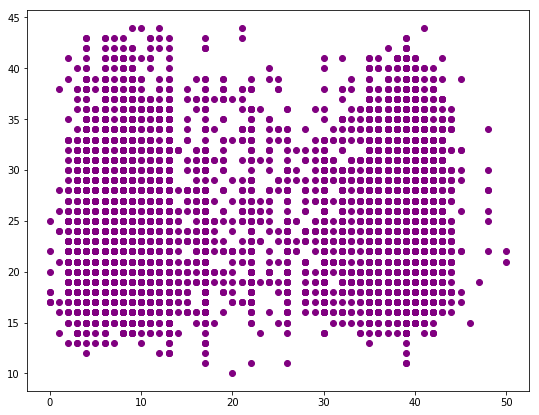

In [21]:
# Plot scatter plot before checking correlations, because some correlation method cannot tell non-linear relationships

## Here I'm trying to see whether pregency length is correlated to age
plt.figure(figsize=(9,7))
plt.scatter(preg_raw['prglngth'], preg_raw['agepreg'].apply(lambda val: round(val/100)), c='purple')

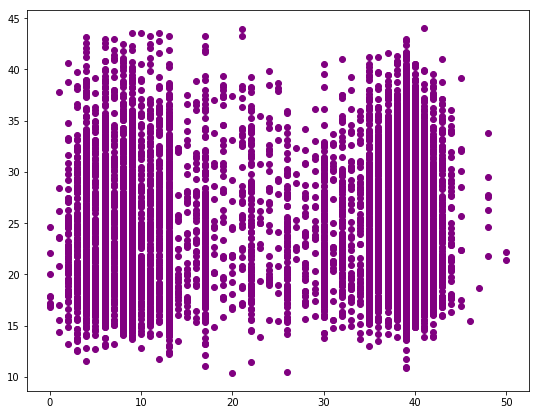

In [22]:
## If I don't round age
plt.figure(figsize=(9,7))
plt.scatter(preg_raw['prglngth'], preg_raw['agepreg'].apply(lambda val: val/100), c='purple')

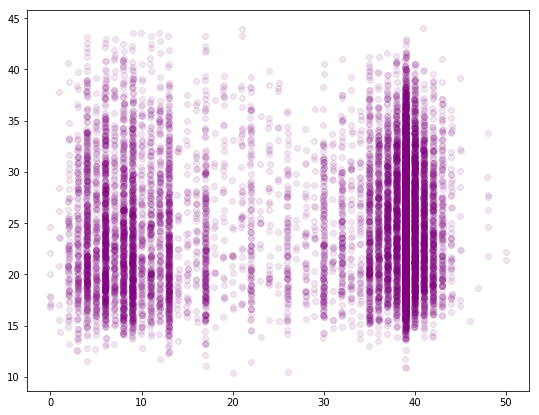

In [26]:
# The pregency length here are recorded in weeks, info like hours has been removed, and we may lost info
## We can use jittering to add random noise in order to reverse the effect of losing info
## NOTE! - Only use jittering in visualization if necessary, don't use it in analysis

## Because many points are overlapping, we can use alpha to set transparency
jitter = 0.07
new_prglngth = preg_raw['prglngth'].apply(lambda val: val+random.uniform(-jitter, jitter))
plt.figure(figsize=(9,7))
plt.scatter(new_prglngth, preg_raw['agepreg'].apply(lambda val: val/100), c='purple', alpha=0.1)

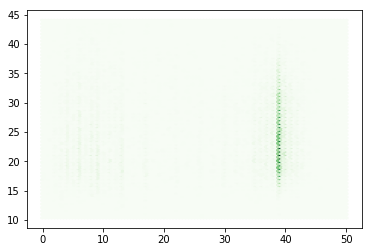

In [34]:
import matplotlib.cm

# For large dataset, we can try hexbin, which divides the graph into hexagonal bins and color each bin according to
## how many data points fall into it

## It seems that most pregency length is 39 weeks, and most mom gave birth between 18 and 25 in 2002
plt.hexbin(new_prglngth, preg_raw['agepreg'].apply(lambda val: val/100), cmap=matplotlib.cm.Greens)